<a href="https://colab.research.google.com/github/wpqc21/VulNeuralNetworks/blob/main/Random_Walk_TensorFlow_01_26_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def map_function(x, lower_bound, upper_bound):
   return (x - lower_bound) % (upper_bound - lower_bound)

In [2]:
def force_mov(x, y, dxy, mag):
    x = int(x)
    y = int(y)
    force_xy = dxy[x][y]
    return mag * (force_xy)
    
    

In [3]:
import numpy as np
import pandas as pd
from pylab import *
import plotly.graph_objects as go
import plotly.express as px
import random
from random import randint
import matplotlib.pyplot as plt
import pylab
import math
import statistics

np.set_printoptions(threshold=np.inf)

In [4]:
%matplotlib inline
import noise
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import axes3d

#### 04/12/2022

# Random Walks

In [5]:
# Scale 2x the Shape
shape = (2000,2000)
scale = 4000.0
octaves = 6
persistence = 0.5
lacunarity = 2.0
seed = random.randint(0, 100)

In [6]:
world = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i/scale, 
                                    j/scale, 
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity, 
                                    repeatx=1024, 
                                    repeaty=1024, 
                                    base=seed)

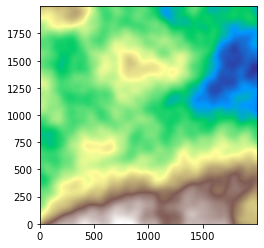

In [7]:
matplotlib.pyplot.imshow(world,cmap='terrain', origin='lower')

In [8]:
# Multiply by 1000 in order to scale correctly
world = world*1000

In [9]:
lin_x = np.linspace(0,1,shape[0],endpoint=False)
lin_y = np.linspace(0,1,shape[1],endpoint=False)
x,y = np.meshgrid(lin_x,lin_y)

#Elevation/Height = Z
Z = world

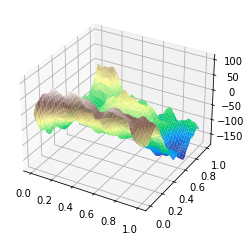

In [10]:
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x,y,Z,cmap='terrain')

terrain_cmap = matplotlib.cm.get_cmap('terrain')
def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []

    for k in range(pl_entries):
        C = list(map(np.uint8, np.array(cmap(k*h)[:3])*255))
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])

    return pl_colorscale

terrain = matplotlib_to_plotly(terrain_cmap, 255)


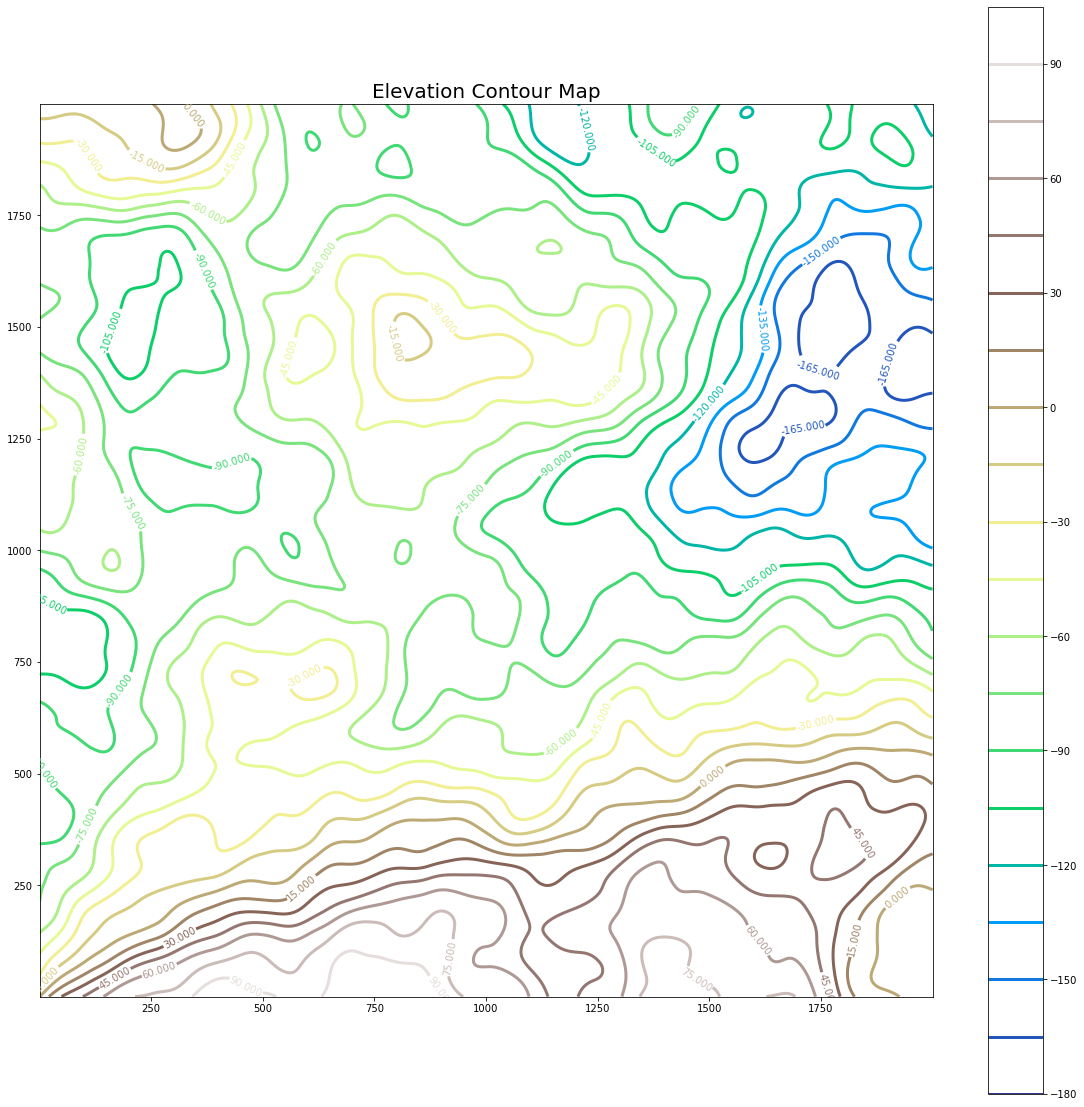

In [11]:
#Find Min, Max, Divide Absolute Value of Sum by 20

a = round(Z.min())

b = round(Z.max())

c = round((abs(Z.min()) + abs(Z.max())) / 20)

fig = plt.figure(figsize = (20, 20), facecolor='white')
ax = fig.add_subplot(111)
ecm = plt.contour(Z, cmap = "terrain", 
            levels = list(range(a, b, c)), linewidths=3,  origin='lower')
ax.clabel(ecm, fontsize=10)
plt.title("Elevation Contour Map", fontsize=20)
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [12]:
avg_2d_land = []

In [13]:
# magnitudes2 = [0.0001, 0.001, 0.01, 0.1, 2]

# mag_plot2 = [str(i) for i in magnitudes2]
# # magnitudes = [str(i) for i in magnitudes]

# print(avg_2d_land, "\n", magnitudes2)

# fig5 = px.line(x = mag_plot2, y = avg_2d_land)
# fig5.show()

In [14]:
# d_x_log = np.log10(magnitudes2)
# d_y_log = np.log10(avg_2d_land)

# fig2 = px.scatter(x = d_x_log, y = d_y_log, trendline="ols")
# fig2.data[1].line.color = 'red'
# fig2.show()

## 10 Steps, 9 Walkers, Force = 0.1

In [15]:
avg_steps = []

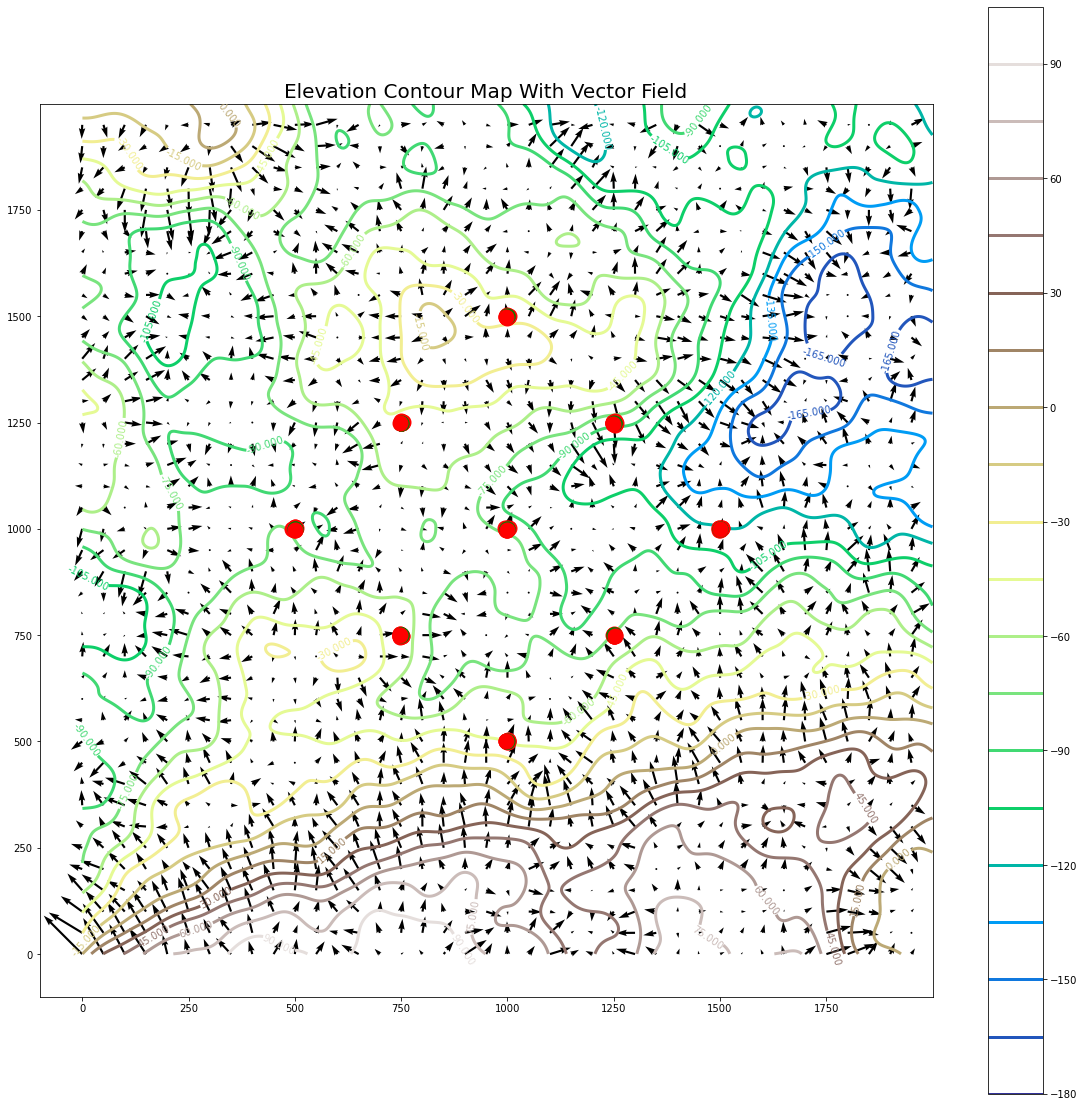

In [16]:
x = np.arange(0,2000,1)
y = np.arange(0,2000,1)

X, Y = np.meshgrid(x, y)

# Negative Z: Arrows Point From Higher to Lower Elevation
# Positive Z: Arrows Point From Lower to Higher Elevation
#dy, dx Initialize Order
dx, dy = np.gradient(-Z)

fig = plt.figure(figsize = (20, 20), facecolor='white')
ax = fig.add_subplot(111)

ecm = plt.contour(Z, cmap = "terrain", 
            levels = list(range(a, b, c)), linewidths=3, origin='lower')
ax.clabel(ecm, fontsize=10)


#Use Quiver to Create Vector Field
#Input Order dy, dx
step=50

ax.quiver(X[::step,::step], Y[::step,::step], dy[::step,::step], dx[::step,::step])

plt.title("Elevation Contour Map With Vector Field", fontsize=20)
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')

avg_2D = []

list_origins = {}
list_points = {}
list_dist = []

all_walks1 = []

A = 1999
N = 10
W = 9

x = np.zeros(N)
y = np.zeros(N)
z = np.zeros(N)

origin = (0, 0)
tx = 0
ty = 0

for m in range(10):

    for walker in range(W):
        if walker == 0:
            x[0] = 1000
            y[0] = 1000
        elif walker == 1:
            x[0] = 1000
            y[0] = 1500
        elif walker == 2:
            x[0] = 1000
            y[0] = 500
        elif walker == 3:
            x[0] = 500
            y[0] = 1000
        elif walker == 4:
            x[0] = 1500
            y[0] = 1000
        elif walker == 5:
            x[0] = 1250
            y[0] = 1250
        elif walker == 6:
            x[0] = 1250
            y[0] = 750
        elif walker == 7:
            x[0] = 750
            y[0] = 1250
        else:
            x[0] = 750
            y[0] = 750
        for i in range(1, N):
            rand = randint(0, 3)
            if rand == 0:
                x[i] = x[i - 1] + 1
                y[i] = y[i - 1]
                x[i] = x[i] + force_mov(x[i], y[i], dy, 0.1)
                y[i] = y[i] + force_mov(x[i], y[i], dx, 0.1)

            elif rand == 1:
                x[i] = x[i - 1] - 1
                y[i] = y[i - 1]
                x[i] = x[i] + force_mov(x[i], y[i], dy, 0.1)
                y[i] = y[i] + force_mov(x[i], y[i], dx, 0.1)

            elif rand == 2:
                x[i] = x[i - 1] 
                y[i] = y[i - 1] + 1
                x[i] = x[i] + force_mov(x[i], y[i], dy, 0.1)
                y[i] = y[i] + force_mov(x[i], y[i], dx, 0.1)

            else:
                x[i] = x[i - 1] 
                y[i] = y[i - 1] - 1
                x[i] = x[i] + force_mov(x[i], y[i], dy, 0.1)
                y[i] = y[i] + force_mov(x[i], y[i], dx, 0.1)
    

        if walker in list_origins:
            list_origins[walker].append((x[0], y[0]))
        else:
            list_origins[walker] = [(x[0], y[0])]
            
        if walker in list_points:
            list_points[walker].append((x[-1], y[-1]))
        else:
            list_points[walker] = [(x[-1], y[-1])]
        
        all_walks1.append((x, y))
        plt.plot(x,y)
        plt.plot(x[0], y[0], 'go', markersize=15)
        plt.plot(x[-1], y[-1],'ro', markersize=15)
        
plt.show()

In [17]:
list_origins

{0: [(1000.0, 1000.0),
  (1000.0, 1000.0),
  (1000.0, 1000.0),
  (1000.0, 1000.0),
  (1000.0, 1000.0),
  (1000.0, 1000.0),
  (1000.0, 1000.0),
  (1000.0, 1000.0),
  (1000.0, 1000.0),
  (1000.0, 1000.0)],
 1: [(1000.0, 1500.0),
  (1000.0, 1500.0),
  (1000.0, 1500.0),
  (1000.0, 1500.0),
  (1000.0, 1500.0),
  (1000.0, 1500.0),
  (1000.0, 1500.0),
  (1000.0, 1500.0),
  (1000.0, 1500.0),
  (1000.0, 1500.0)],
 2: [(1000.0, 500.0),
  (1000.0, 500.0),
  (1000.0, 500.0),
  (1000.0, 500.0),
  (1000.0, 500.0),
  (1000.0, 500.0),
  (1000.0, 500.0),
  (1000.0, 500.0),
  (1000.0, 500.0),
  (1000.0, 500.0)],
 3: [(500.0, 1000.0),
  (500.0, 1000.0),
  (500.0, 1000.0),
  (500.0, 1000.0),
  (500.0, 1000.0),
  (500.0, 1000.0),
  (500.0, 1000.0),
  (500.0, 1000.0),
  (500.0, 1000.0),
  (500.0, 1000.0)],
 4: [(1500.0, 1000.0),
  (1500.0, 1000.0),
  (1500.0, 1000.0),
  (1500.0, 1000.0),
  (1500.0, 1000.0),
  (1500.0, 1000.0),
  (1500.0, 1000.0),
  (1500.0, 1000.0),
  (1500.0, 1000.0),
  (1500.0, 1000.0)],


In [18]:
list_points

{0: [(1000.0839255750179, 997.3033712506294),
  (994.0833451747894, 1001.3005523234606),
  (997.0844456255436, 996.3028366714716),
  (1000.0842083245516, 999.3040444105864),
  (1003.0839237123728, 1002.3039196133614),
  (998.0835958868265, 1001.3041435033083),
  (1000.0842947512865, 997.304114446044),
  (998.0835366547108, 999.3041293472052),
  (999.0835251063108, 1000.3040287643671),
  (999.083564966917, 998.3041464835405)],
 1: [(1002.0484336167574, 1501.1965589821339),
  (996.0476747751236, 1499.197110325098),
  (998.0469673424959, 1495.1952961087227),
  (1003.0490985810757, 1500.1959383487701),
  (1000.0490471720695, 1501.1958932727575),
  (1001.0487871468067, 1498.1948796212673),
  (996.0476844608784, 1501.1974236220121),
  (998.0479564070702, 1503.1969207078218),
  (999.048166885972, 1500.1962628215551),
  (996.047904998064, 1499.196398049593)],
 2: [(997.1905415207148, 500.13248808681965),
  (1001.1907728612423, 502.131793692708),
  (1001.1901522278786, 500.13215877115726),
  (1

In [19]:
list_dist_10 = {}

for value1, value2 in zip(list_origins.values(), list_points.values()):
    for i, j in zip(value1, value2):
        list_dist_10[i] = []

for value1, value2 in zip(list_origins.values(), list_points.values()):
    for i, j in zip(value1, value2):
        d = math.dist(i, j)
        list_dist_10[i].append(d)

In [20]:
list_dist_10

{(1000.0, 1000.0): [2.6979344161921355,
  6.057907284429686,
  4.708447088821017,
  0.7010315430562847,
  3.8494975059826007,
  2.318058455304673,
  2.6972030930434725,
  2.038888844262556,
  0.9655877589971493,
  1.9276338654292475],
 (1000.0, 1500.0): [2.372305562103458,
  4.033051761787653,
  5.186474336592519,
  3.0553876993986253,
  1.1968986360234255,
  2.08768150373159,
  4.129724137437626,
  3.745767771872486,
  0.9718566623144482,
  4.032968013637743],
 (1000.0, 500.0): [2.812580672616674,
  2.441819885933612,
  1.1974674385210327,
  2.3552664359393845,
  2.006557714451405,
  2.81209182833329,
  2.133782199453515,
  0.8203275841554404,
  3.137609055758285,
  2.8119786626889836],
 (500.0, 1000.0): [4.45881061089744,
  3.937412176972592,
  2.477346713178488,
  2.4966298983038744,
  5.317074388326021,
  5.917371721113099,
  1.321687387760521,
  1.8993280424033963,
  2.6878245390882265,
  3.854429584117608],
 (1500.0, 1000.0): [2.1083391448298086,
  4.150675732009532,
  4.15069512

In [21]:
avg_points = []
for i in list_dist_10:
    print("The max distance of origin ", i, " : " , max(list_dist_10[i]))
    print("The min distance of origin ", i, " : " , min(list_dist_10[i]))
    print("The median distance of origin ", i, " : " , statistics.median(list_dist_10[i]))
    print("The average distance of origin ", i, " : " , mean(list_dist_10[i]))
    avg_points.append(mean(list_dist_10[i]))
    print("\n")

avg_steps.append(mean(avg_points))

The max distance of origin  (1000.0, 1000.0)  :  6.057907284429686
The min distance of origin  (1000.0, 1000.0)  :  0.7010315430562847
The median distance of origin  (1000.0, 1000.0)  :  2.5076307741740727
The average distance of origin  (1000.0, 1000.0)  :  2.7962189855518824


The max distance of origin  (1000.0, 1500.0)  :  5.186474336592519
The min distance of origin  (1000.0, 1500.0)  :  0.9718566623144482
The median distance of origin  (1000.0, 1500.0)  :  3.4005777356355558
The average distance of origin  (1000.0, 1500.0)  :  3.0812116084899572


The max distance of origin  (1000.0, 500.0)  :  3.137609055758285
The min distance of origin  (1000.0, 500.0)  :  0.8203275841554404
The median distance of origin  (1000.0, 500.0)  :  2.398543160936498
The average distance of origin  (1000.0, 500.0)  :  2.2529481477851623


The max distance of origin  (500.0, 1000.0)  :  5.917371721113099
The min distance of origin  (500.0, 1000.0)  :  1.321687387760521
The median distance of origin  (5

## 100 Steps, 9 Walkers, Force = 0.1

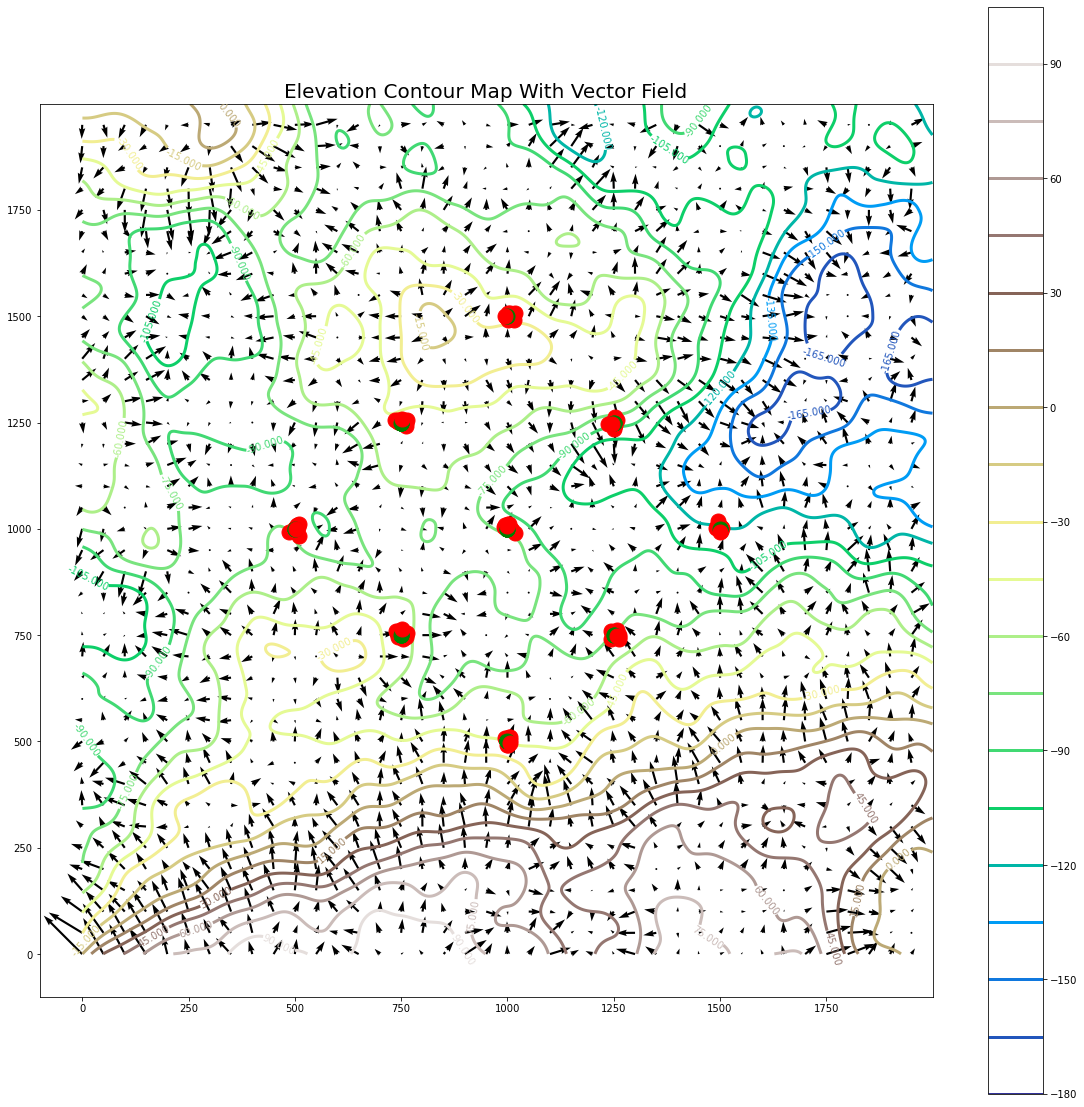

In [22]:
x = np.arange(0,2000,1)
y = np.arange(0,2000,1)

X, Y = np.meshgrid(x, y)

# Negative Z: Arrows Point From Higher to Lower Elevation
# Positive Z: Arrows Point From Lower to Higher Elevation
#dy, dx Initialize Order
dx, dy = np.gradient(-Z)

fig = plt.figure(figsize = (20, 20), facecolor='white')
ax = fig.add_subplot(111)

ecm = plt.contour(Z, cmap = "terrain", 
            levels = list(range(a, b, c)), linewidths=3, origin='lower')
ax.clabel(ecm, fontsize=10)


#Use Quiver to Create Vector Field
#Input Order dy, dx
step=50

ax.quiver(X[::step,::step], Y[::step,::step], dy[::step,::step], dx[::step,::step])

plt.title("Elevation Contour Map With Vector Field", fontsize=20)
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')

avg_2D = []

list_origins = {}
list_points = {}
list_dist = []

all_walks1 = []

A = 1999
N = 100
W = 9

x = np.zeros(N)
y = np.zeros(N)
z = np.zeros(N)

origin = (0, 0)
tx = 0
ty = 0

for m in range(10):
    for walker in range(W):
        if walker == 0:
            x[0] = 1000
            y[0] = 1000
        elif walker == 1:
            x[0] = 1000
            y[0] = 1500
        elif walker == 2:
            x[0] = 1000
            y[0] = 500
        elif walker == 3:
            x[0] = 500
            y[0] = 1000
        elif walker == 4:
            x[0] = 1500
            y[0] = 1000
        elif walker == 5:
            x[0] = 1250
            y[0] = 1250
        elif walker == 6:
            x[0] = 1250
            y[0] = 750
        elif walker == 7:
            x[0] = 750
            y[0] = 1250
        else:
            x[0] = 750
            y[0] = 750
        for i in range(1, N):
            rand = randint(0, 3)
            if rand == 0:
                x[i] = x[i - 1] + 1
                y[i] = y[i - 1]
                x[i] = x[i] + force_mov(x[i], y[i], dy, 0.1)
                y[i] = y[i] + force_mov(x[i], y[i], dx, 0.1)

            elif rand == 1:
                x[i] = x[i - 1] - 1
                y[i] = y[i - 1]
                x[i] = x[i] + force_mov(x[i], y[i], dy, 0.1)
                y[i] = y[i] + force_mov(x[i], y[i], dx, 0.1)

            elif rand == 2:
                x[i] = x[i - 1] 
                y[i] = y[i - 1] + 1
                x[i] = x[i] + force_mov(x[i], y[i], dy, 0.1)
                y[i] = y[i] + force_mov(x[i], y[i], dx, 0.1)

            else:
                x[i] = x[i - 1] 
                y[i] = y[i - 1] - 1
                x[i] = x[i] + force_mov(x[i], y[i], dy, 0.1)
                y[i] = y[i] + force_mov(x[i], y[i], dx, 0.1)
    

        if walker in list_origins:
            list_origins[walker].append((x[0], y[0]))
        else:
            list_origins[walker] = [(x[0], y[0])]
            
        if walker in list_points:
            list_points[walker].append((x[-1], y[-1]))
        else:
            list_points[walker] = [(x[-1], y[-1])]
            
        all_walks1.append((x, y))
        plt.plot(x,y)
        plt.plot(x[0], y[0], 'go', markersize=15)
        plt.plot(x[-1], y[-1],'ro', markersize=15)

plt.show()

In [23]:
list_dist_100 = {}

for value1, value2 in zip(list_origins.values(), list_points.values()):
    for i, j in zip(value1, value2):
        list_dist_100[i] = []

for value1, value2 in zip(list_origins.values(), list_points.values()):
    for i, j in zip(value1, value2):
        d = math.dist(i, j)
        list_dist_100[i].append(d)

In [24]:
avg_points = []
for i in list_dist_100:
    print("The max distance of origin ", i, " : " , max(list_dist_100[i]))
    print("The min distance of origin ", i, " : " , min(list_dist_100[i]))
    print("The median distance of origin ", i, " : " , statistics.median(list_dist_100[i]))
    print("The average distance of origin ", i, " : " , mean(list_dist_100[i]))
    avg_points.append(mean(list_dist_100[i]))
    print("\n")

avg_steps.append(mean(avg_points))

The max distance of origin  (1000.0, 1000.0)  :  20.02163774078625
The min distance of origin  (1000.0, 1000.0)  :  2.942534903636606
The median distance of origin  (1000.0, 1000.0)  :  9.86432654570596
The average distance of origin  (1000.0, 1000.0)  :  9.6156772252664


The max distance of origin  (1000.0, 1500.0)  :  18.762608255445347
The min distance of origin  (1000.0, 1500.0)  :  3.0795695556482543
The median distance of origin  (1000.0, 1500.0)  :  7.603401488020785
The average distance of origin  (1000.0, 1500.0)  :  8.96038798428897


The max distance of origin  (1000.0, 500.0)  :  12.096168564050599
The min distance of origin  (1000.0, 500.0)  :  1.7106909648488957
The median distance of origin  (1000.0, 500.0)  :  7.851175712953037
The average distance of origin  (1000.0, 500.0)  :  7.561915466795061


The max distance of origin  (500.0, 1000.0)  :  19.57771917423025
The min distance of origin  (500.0, 1000.0)  :  1.5931164584199973
The median distance of origin  (500.0, 1

## 1,000 Steps, 9 Walkers, Force = 0.1

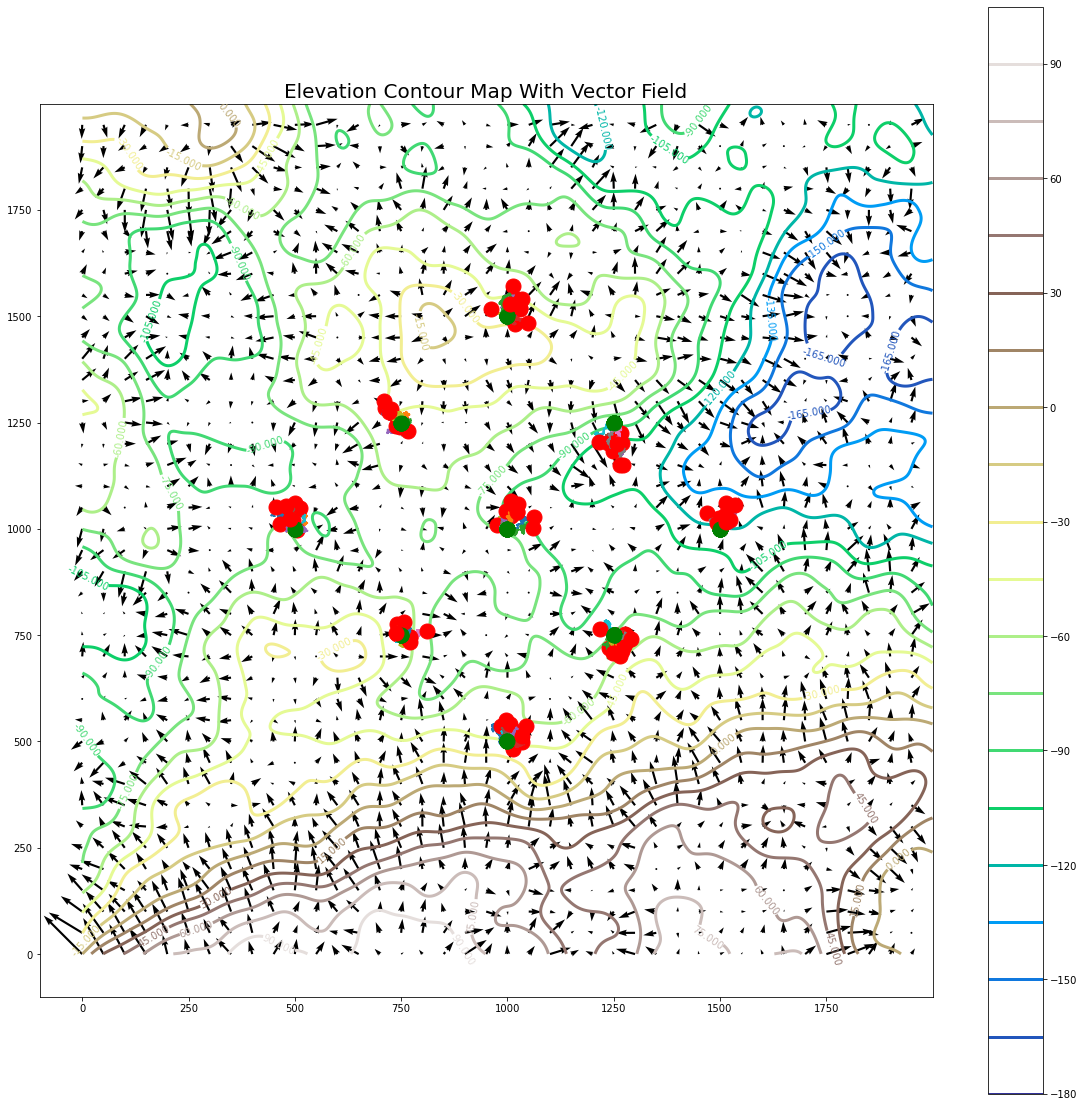

In [25]:
x = np.arange(0,2000,1)
y = np.arange(0,2000,1)

X, Y = np.meshgrid(x, y)

# Negative Z: Arrows Point From Higher to Lower Elevation
# Positive Z: Arrows Point From Lower to Higher Elevation
#dy, dx Initialize Order
dx, dy = np.gradient(-Z)

fig = plt.figure(figsize = (20, 20), facecolor='white')
ax = fig.add_subplot(111)

ecm = plt.contour(Z, cmap = "terrain", 
            levels = list(range(a, b, c)), linewidths=3, origin='lower')
ax.clabel(ecm, fontsize=10)


#Use Quiver to Create Vector Field
#Input Order dy, dx
step=50

ax.quiver(X[::step,::step], Y[::step,::step], dy[::step,::step], dx[::step,::step])

plt.title("Elevation Contour Map With Vector Field", fontsize=20)
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')

avg_2D = []

list_origins = {}
list_points = {}
list_dist = []

all_walks1 = []

A = 1999
N = 1000
W = 9

x = np.zeros(N)
y = np.zeros(N)
z = np.zeros(N)

origin = (0, 0)
tx = 0
ty = 0

for m in range(10):
    for walker in range(W):
        if walker == 0:
            x[0] = 1000
            y[0] = 1000
        elif walker == 1:
            x[0] = 1000
            y[0] = 1500
        elif walker == 2:
            x[0] = 1000
            y[0] = 500
        elif walker == 3:
            x[0] = 500
            y[0] = 1000
        elif walker == 4:
            x[0] = 1500
            y[0] = 1000
        elif walker == 5:
            x[0] = 1250
            y[0] = 1250
        elif walker == 6:
            x[0] = 1250
            y[0] = 750
        elif walker == 7:
            x[0] = 750
            y[0] = 1250
        else:
            x[0] = 750
            y[0] = 750
        for i in range(1, N):
            rand = randint(0, 3)
            if rand == 0:
                x[i] = x[i - 1] + 1
                y[i] = y[i - 1]
                x[i] = x[i] + force_mov(x[i], y[i], dy, 0.1)
                y[i] = y[i] + force_mov(x[i], y[i], dx, 0.1)

            elif rand == 1:
                x[i] = x[i - 1] - 1
                y[i] = y[i - 1]
                x[i] = x[i] + force_mov(x[i], y[i], dy, 0.1)
                y[i] = y[i] + force_mov(x[i], y[i], dx, 0.1)

            elif rand == 2:
                x[i] = x[i - 1] 
                y[i] = y[i - 1] + 1
                x[i] = x[i] + force_mov(x[i], y[i], dy, 0.1)
                y[i] = y[i] + force_mov(x[i], y[i], dx, 0.1)

            else:
                x[i] = x[i - 1] 
                y[i] = y[i - 1] - 1
                x[i] = x[i] + force_mov(x[i], y[i], dy, 0.1)
                y[i] = y[i] + force_mov(x[i], y[i], dx, 0.1)
    

        if walker in list_origins:
            list_origins[walker].append((x[0], y[0]))
        else:
            list_origins[walker] = [(x[0], y[0])]
            
        if walker in list_points:
            list_points[walker].append((x[-1], y[-1]))
        else:
            list_points[walker] = [(x[-1], y[-1])]
            
        all_walks1.append((x, y))
        plt.plot(x,y)
        plt.plot(x[0], y[0], 'go', markersize=15)
        plt.plot(x[-1], y[-1],'ro', markersize=15)

plt.show()

In [26]:
list_dist_1000 = {}

for value1, value2 in zip(list_origins.values(), list_points.values()):
    for i, j in zip(value1, value2):
        list_dist_1000[i] = []

for value1, value2 in zip(list_origins.values(), list_points.values()):
    for i, j in zip(value1, value2):
        d = math.dist(i, j)
        list_dist_1000[i].append(d)

In [27]:
avg_points = []
for i in list_dist_1000:
    print("The max distance of origin ", i, " : " , max(list_dist_1000[i]))
    print("The min distance of origin ", i, " : " , min(list_dist_1000[i]))
    print("The median distance of origin ", i, " : " , statistics.median(list_dist_1000[i]))
    print("The average distance of origin ", i, " : " , mean(list_dist_1000[i]))
    avg_points.append(mean(list_dist_1000[i]))
    print("\n")
    
avg_steps.append(mean(avg_points))

The max distance of origin  (1000.0, 1000.0)  :  68.78418690071497
The min distance of origin  (1000.0, 1000.0)  :  12.688742276287387
The median distance of origin  (1000.0, 1000.0)  :  45.73084871313824
The average distance of origin  (1000.0, 1000.0)  :  46.04625811530903


The max distance of origin  (1000.0, 1500.0)  :  73.39253034868676
The min distance of origin  (1000.0, 1500.0)  :  20.29104339370547
The median distance of origin  (1000.0, 1500.0)  :  37.82764240088924
The average distance of origin  (1000.0, 1500.0)  :  40.762895351537125


The max distance of origin  (1000.0, 500.0)  :  57.537204866076436
The min distance of origin  (1000.0, 500.0)  :  22.009795158395384
The median distance of origin  (1000.0, 500.0)  :  35.96163220125763
The average distance of origin  (1000.0, 500.0)  :  37.12912938059607


The max distance of origin  (500.0, 1000.0)  :  66.47480967397745
The min distance of origin  (500.0, 1000.0)  :  4.765583521097834
The median distance of origin  (500.0

## 10,000 Steps, 9 Walkers, Force = 0.1

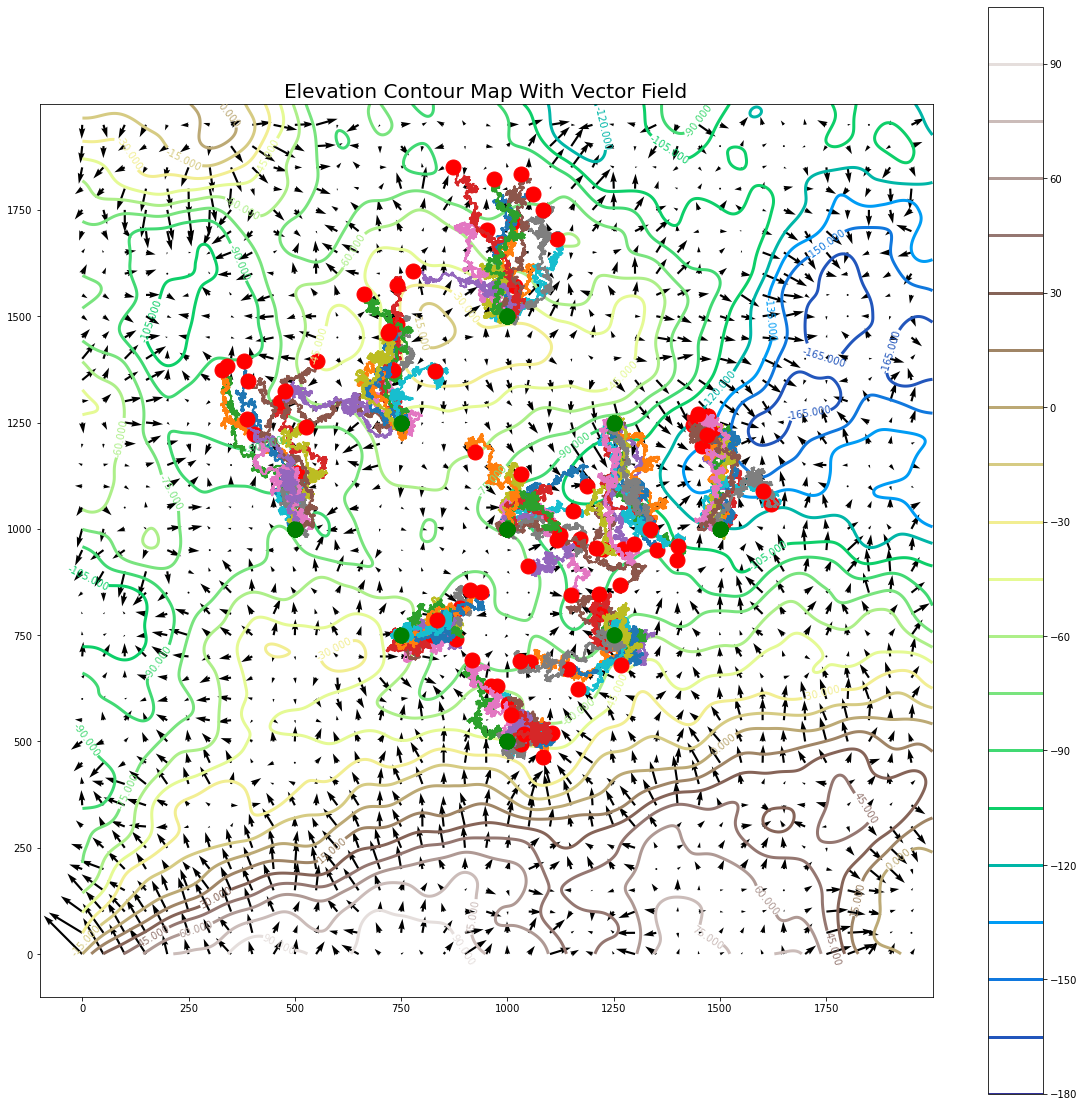

In [28]:
x = np.arange(0,2000,1)
y = np.arange(0,2000,1)

X, Y = np.meshgrid(x, y)

# Negative Z: Arrows Point From Higher to Lower Elevation
# Positive Z: Arrows Point From Lower to Higher Elevation
#dy, dx Initialize Order
dx, dy = np.gradient(-Z)

fig = plt.figure(figsize = (20, 20), facecolor='white')
ax = fig.add_subplot(111)

ecm = plt.contour(Z, cmap = "terrain", 
            levels = list(range(a, b, c)), linewidths=3, origin='lower')
ax.clabel(ecm, fontsize=10)


#Use Quiver to Create Vector Field
#Input Order dy, dx
step=50

ax.quiver(X[::step,::step], Y[::step,::step], dy[::step,::step], dx[::step,::step])

plt.title("Elevation Contour Map With Vector Field", fontsize=20)
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')

avg_2D = []

list_origins = {}
list_points = {}
list_dist = []

all_walks1 = []

A = 1999
N = 10000
W = 9

x = np.zeros(N)
y = np.zeros(N)
z = np.zeros(N)

origin = (0, 0)
tx = 0
ty = 0

for m in range(10):
    for walker in range(W):
        if walker == 0:
            x[0] = 1000
            y[0] = 1000
        elif walker == 1:
            x[0] = 1000
            y[0] = 1500
        elif walker == 2:
            x[0] = 1000
            y[0] = 500
        elif walker == 3:
            x[0] = 500
            y[0] = 1000
        elif walker == 4:
            x[0] = 1500
            y[0] = 1000
        elif walker == 5:
            x[0] = 1250
            y[0] = 1250
        elif walker == 6:
            x[0] = 1250
            y[0] = 750
        elif walker == 7:
            x[0] = 750
            y[0] = 1250
        else:
            x[0] = 750
            y[0] = 750
        for i in range(1, N):
            rand = randint(0, 3)
            if rand == 0:
                x[i] = x[i - 1] + 1
                y[i] = y[i - 1]
                x[i] = x[i] + force_mov(x[i], y[i], dy, 0.1)
                y[i] = y[i] + force_mov(x[i], y[i], dx, 0.1)

            elif rand == 1:
                x[i] = x[i - 1] - 1
                y[i] = y[i - 1]
                x[i] = x[i] + force_mov(x[i], y[i], dy, 0.1)
                y[i] = y[i] + force_mov(x[i], y[i], dx, 0.1)

            elif rand == 2:
                x[i] = x[i - 1] 
                y[i] = y[i - 1] + 1
                x[i] = x[i] + force_mov(x[i], y[i], dy, 0.1)
                y[i] = y[i] + force_mov(x[i], y[i], dx, 0.1)

            else:
                x[i] = x[i - 1] 
                y[i] = y[i - 1] - 1
                x[i] = x[i] + force_mov(x[i], y[i], dy, 0.1)
                y[i] = y[i] + force_mov(x[i], y[i], dx, 0.1)
    

        if walker in list_origins:
            list_origins[walker].append((x[0], y[0]))
        else:
            list_origins[walker] = [(x[0], y[0])]
            
        if walker in list_points:
            list_points[walker].append((x[-1], y[-1]))
        else:
            list_points[walker] = [(x[-1], y[-1])]
            
        all_walks1.append((x, y))
        plt.plot(x,y)
        plt.plot(x[0], y[0], 'go', markersize=15)
        plt.plot(x[-1], y[-1],'ro', markersize=15)

plt.show()

In [29]:
list_dist_10000 = {}

for value1, value2 in zip(list_origins.values(), list_points.values()):
    for i, j in zip(value1, value2):
        list_dist_10000[i] = []

for value1, value2 in zip(list_origins.values(), list_points.values()):
    for i, j in zip(value1, value2):
        d = math.dist(i, j)
        list_dist_10000[i].append(d)

In [30]:
avg_points = []
for i in list_dist_10000:
    print("The max distance of origin ", i, " : " , max(list_dist_10000[i]))
    print("The min distance of origin ", i, " : " , min(list_dist_10000[i]))
    print("The median distance of origin ", i, " : " , statistics.median(list_dist_10000[i]))
    print("The average distance of origin ", i, " : " , mean(list_dist_10000[i]))
    avg_points.append(mean(list_dist_10000[i]))
    print("\n")

avg_steps.append(mean(avg_points))

The max distance of origin  (1000.0, 1000.0)  :  296.6063082829638
The min distance of origin  (1000.0, 1000.0)  :  100.21487607959331
The median distance of origin  (1000.0, 1000.0)  :  164.97187966974883
The average distance of origin  (1000.0, 1000.0)  :  172.83481478304435


The max distance of origin  (1000.0, 1500.0)  :  373.8383051236674
The min distance of origin  (1000.0, 1500.0)  :  72.2189455607715
The median distance of origin  (1000.0, 1500.0)  :  255.0230505802003
The average distance of origin  (1000.0, 1500.0)  :  255.77573074014927


The max distance of origin  (1000.0, 500.0)  :  210.02041975148958
The min distance of origin  (1000.0, 500.0)  :  32.33253643488136
The median distance of origin  (1000.0, 500.0)  :  89.08443299139789
The average distance of origin  (1000.0, 500.0)  :  95.78473073546297


The max distance of origin  (500.0, 1000.0)  :  415.3720212523596
The min distance of origin  (500.0, 1000.0)  :  129.38299027240583
The median distance of origin  (500.

In [31]:
avg_steps

[2.708935704257105, 9.275403105487495, 39.019339743206615, 199.36379459395116]

In [32]:
avg_dist = avg_steps.copy()

In [33]:
steps = [10, 100, 1000, 10000]


print(steps, "\n", avg_dist)

fig5 = px.line(x = steps, y = avg_dist)
fig5.show()

[10, 100, 1000, 10000] 
 [2.708935704257105, 9.275403105487495, 39.019339743206615, 199.36379459395116]


In [34]:
d_x_log = np.log10(steps)
d_y_log = np.log10(avg_dist)

fig2 = px.scatter(x = d_x_log, y = d_y_log, trendline="ols")
fig2.data[1].line.color = 'red'
fig2.show()